# Análise Exploratória de Falhas de Startups

Objetivo:
---------
Explorar os dados de startups que falharam, identificar padrões de falha,
setores mais impactados, causas recorrentes e gerar insights iniciais
para análise estratégica.

In [22]:
# Configuração inicial
import sys
import os
sys.path.append(os.getcwd())  # garante que src seja reconhecido

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.data.load_data import load_startup_data

# Configuração de gráficos
sns.set(style="whitegrid")
%matplotlib inline

In [23]:
# Carregamento dos dados
df = load_startup_data("data/raw")
df.head()

📂 Carregando arquivo: Startup_Failure_Finance_and_Insurance.csv
📂 Carregando arquivo: Startup_Failure_Retail_Trade.csv
📂 Carregando arquivo: Startup_Failure_Manufactures.csv
📂 Carregando arquivo: Startup_Failures_Information_Sector.csv
📂 Carregando arquivo: Startup_Failure_Food_and_services.csv
📂 Carregando arquivo: Startup_Failures.csv
📂 Carregando arquivo: Startup_Failure_Health_Care.csv

 Total de registros combinados: 1224
 Total de colunas: 22


,Name,Sector,Years of Operation,What They Did,How Much They Raised,Why They Failed,Takeaway,Giants,No Budget,Competition,...,Platform Dependency,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype,Source_File,High Operational Costs
0,Avant,Finance and Insurance,2012-2023,Online personal loans,$655M,Lost to LendingClub and high defaults,Lending needs risk balance,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Startup_Failure_Finance_and_Insurance.csv,NaN
1,Bitpass,Finance and Insurance,2002-2008,Micropayments platform,$2M,Lost to PayPal and low adoption,Micropayments need mass use,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Startup_Failure_Finance_and_Insurance.csv,NaN
2,Cake Financial,Finance and Insurance,2006-2011,Portfolio tracking tool,$3M,Lost to Mint and sold to TradeKing,Finance tools need scale,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Startup_Failure_Finance_and_Insurance.csv,NaN
3,Circle,Finance and Insurance,2013-2023,Crypto payments and stablecoin,$500M,Lost to Coinbase and market shifts,Crypto needs stability,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Startup_Failure_Finance_and_Insurance.csv,NaN
4,Clarity Money,Finance and Insurance,2016-2022,Personal finance app,$11M,Lost to Mint/Acorns and sold to Goldman,Finance apps need edge,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Startup_Failure_Finance_and_Insurance.csv,NaN


In [24]:
# Informações gerais do dataset
print(f"Total de registros: {len(df)}")
print(f"Total de colunas: {len(df.columns)}")
df.info()
df.describe(include="all").T

Total de registros: 1224
Total de colunas: 22
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    1224 non-null   object 
 1   Sector                  1224 non-null   object 
 2   Years of Operation      1224 non-null   object 
 3   What They Did           409 non-null    object 
 4   How Much They Raised    409 non-null    object 
 5   Why They Failed         409 non-null    object 
 6   Takeaway                409 non-null    object 
 7   Giants                  409 non-null    float64
 8   No Budget               409 non-null    float64
 9   Competition             409 non-null    float64
 10  Poor Market Fit         409 non-null    float64
 11  Acquisition Stagnation  409 non-null    float64
 12  Platform Dependency     383 non-null    float64
 13  Monetization Failure    409 non-null    float64

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,1224,891,Jawbone,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,1224,13,Information,526,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Years of Operation,1224,232,8 (2012-2020),39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
What They Did,409,398,Personal finance app,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
How Much They Raised,409,215,$10M,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Why They Failed,409,404,Closed 2019; high costs; lost to DoorDash,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Takeaway,409,396,Payments need scale,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Giants,409.0,NaN,NaN,NaN,0.753056,0.431762,0.0,1.0,1.0,1.0,1.0
No Budget,409.0,NaN,NaN,NaN,0.188264,0.391402,0.0,0.0,0.0,0.0,1.0
Competition,409.0,NaN,NaN,NaN,0.711491,0.453624,0.0,0.0,1.0,1.0,1.0


In [21]:
# Verificação de valores nulos
nulls = df.isnull().sum().sort_values(ascending=False)
nulls_percent = (nulls / len(df) * 100).round(2)
pd.DataFrame({"Total Nulos": nulls, "% Nulos": nulls_percent})


,Total Nulos,% Nulos
High Operational Costs,1198,97.88
Overhype,842,68.79
Toxicity/Trust Issues,841,68.71
Platform Dependency,841,68.71
Regulatory Pressure,841,68.71
How Much They Raised,815,66.58
Monetization Failure,815,66.58
Acquisition Stagnation,815,66.58
Poor Market Fit,815,66.58
Why They Failed,815,66.58


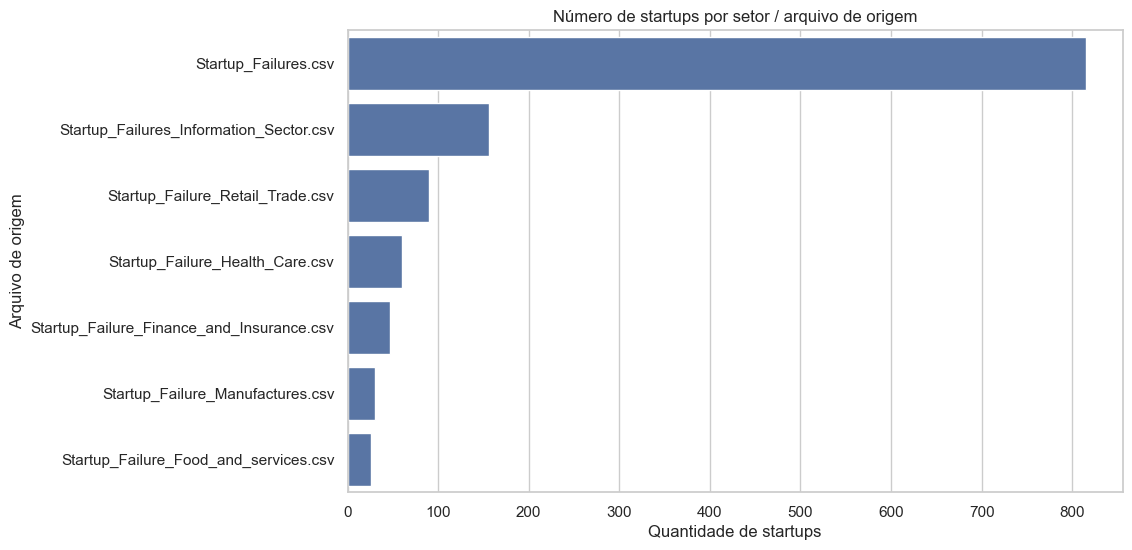

In [25]:
# Distribuição de startups por setor / arquivo de origem
plt.figure(figsize=(10,6))
sns.countplot(y="Source_File", data=df, order=df["Source_File"].value_counts().index)
plt.title("Número de startups por setor / arquivo de origem")
plt.xlabel("Quantidade de startups")
plt.ylabel("Arquivo de origem")
plt.show()

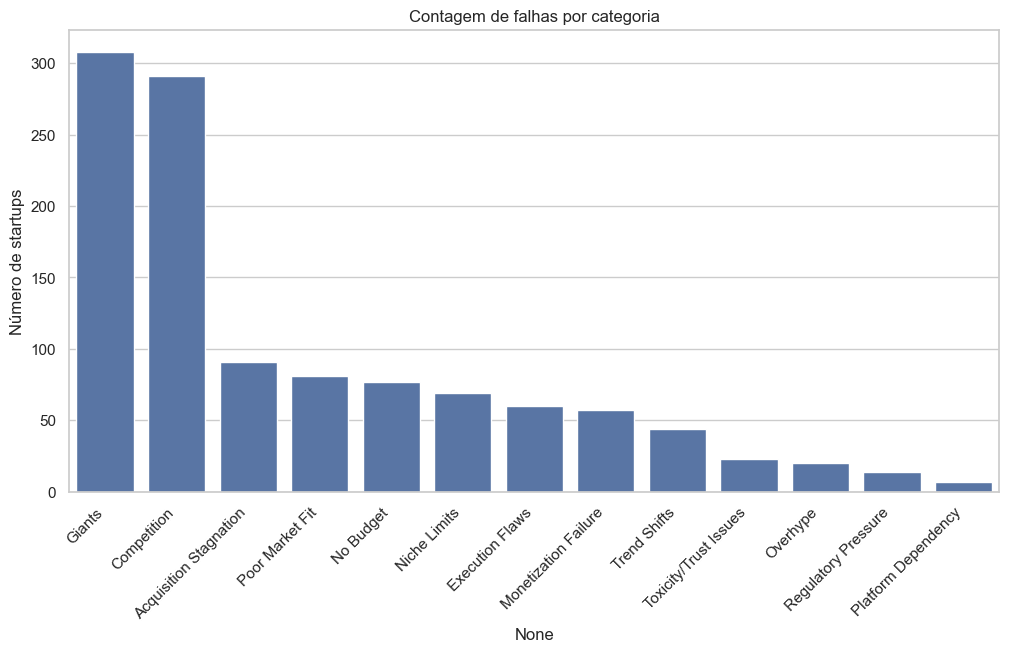

In [15]:
# Distribuição das causas de falha binárias
binary_cols = ["Giants","No Budget","Competition","Poor Market Fit",
               "Acquisition Stagnation","Platform Dependency","Monetization Failure",
               "Niche Limits","Execution Flaws","Trend Shifts","Toxicity/Trust Issues",
               "Regulatory Pressure","Overhype"]

plt.figure(figsize=(12,6))
sns.barplot(x=df[binary_cols].sum().sort_values(ascending=False).index,
            y=df[binary_cols].sum().sort_values(ascending=False).values)
plt.title("Contagem de falhas por categoria")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Número de startups")
plt.show()

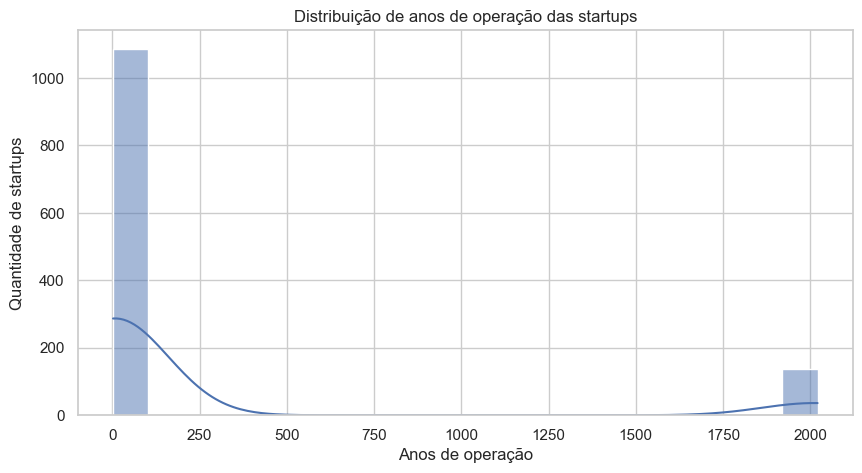

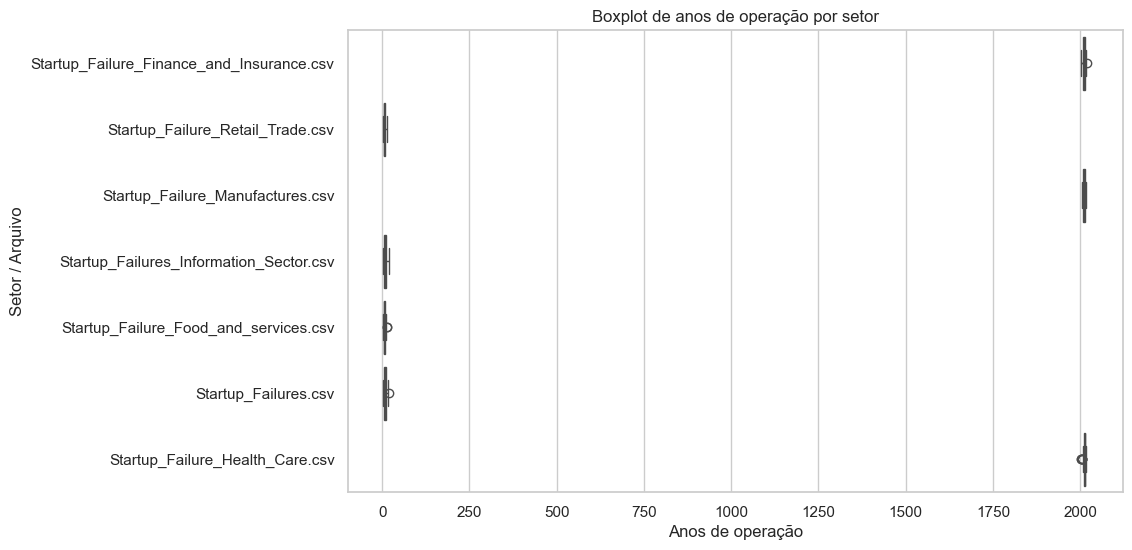

In [28]:
# Análise de anos de operação
df['Years_of_Operation_Num'] = df['Years of Operation'].str.extract(r'(\d+)').astype(float)

plt.figure(figsize=(10,5))
sns.histplot(df['Years_of_Operation_Num'], bins=20, kde=True)
plt.title("Distribuição de anos de operação das startups")
plt.xlabel("Anos de operação")
plt.ylabel("Quantidade de startups")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='Years_of_Operation_Num', y='Source_File', data=df)
plt.title("Boxplot de anos de operação por setor")
plt.xlabel("Anos de operação")
plt.ylabel("Setor / Arquivo")
plt.show()

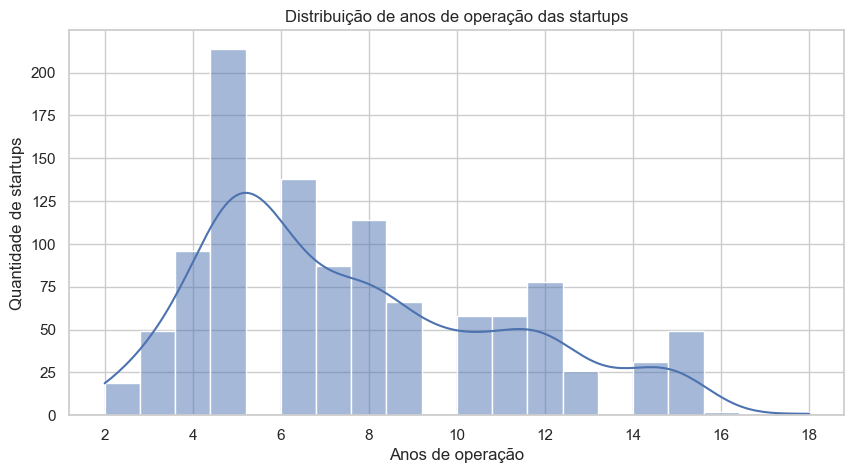

In [34]:
# Ajustando os anos de operação das startups
df['Years_of_Operation_Num'] = (
    df['Years of Operation']
      .str.extract(r'(\d+)')[0]  # pega o primeiro grupo
      .astype(float)
)

df = df[df['Years_of_Operation_Num'] <= 50]

plt.figure(figsize=(10,5))
sns.histplot(df['Years_of_Operation_Num'], bins=20, kde=True)
plt.title("Distribuição de anos de operação das startups")
plt.xlabel("Anos de operação")
plt.ylabel("Quantidade de startups")
plt.show()

In [37]:
# Fazend ajustes nos anos de operação para ajustar o bloxspot corretamente

def extract_years_of_operation(s):
    """
    Extrai o número de anos de operação de uma string como '3 (2010-2013)' ou '10+ (2005-2015)'
    Retorna NaN se não conseguir extrair
    """
    import re
    
    if pd.isna(s):
        return np.nan
    
    # Procura por números antes do primeiro parêntese ou '+' 
    match = re.search(r'(\d+)(?=\s*\+?\s*\()', s)
    if match:
        return float(match.group(1))
    
    # Caso não tenha parêntese, pega o primeiro número
    match = re.search(r'(\d+)', s)
    if match:
        return float(match.group(1))
    
    return np.nan

# Aplicar a função
df['Years_of_Operation_Num'] = df['Years of Operation'].apply(extract_years_of_operation)

# Filtrar valores absurdos (>50 anos provavelmente errados)
df = df[df['Years_of_Operation_Num'] <= 50]

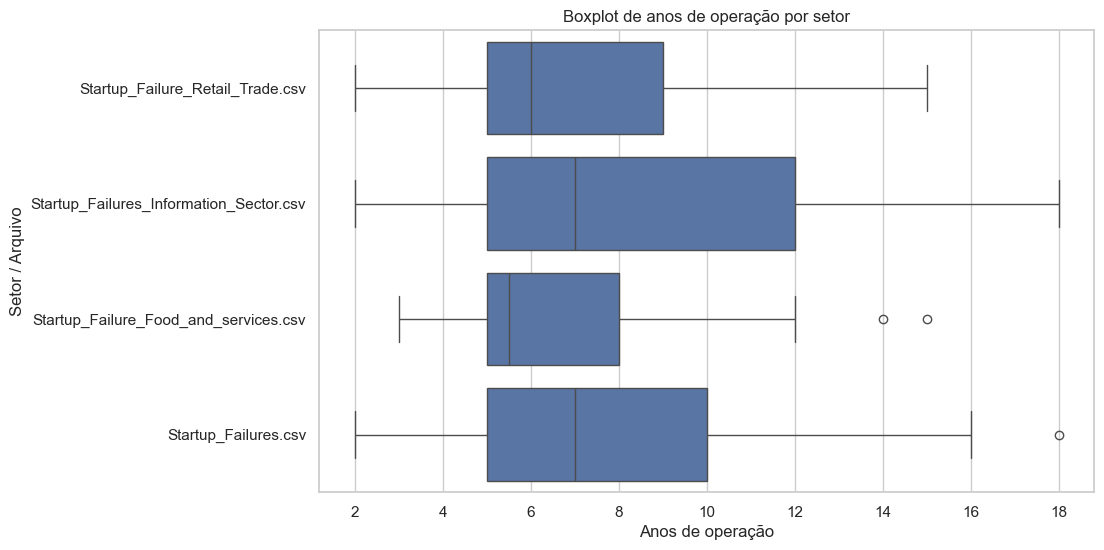

In [38]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Years_of_Operation_Num', y='Source_File', data=df)
plt.title("Boxplot de anos de operação por setor")
plt.xlabel("Anos de operação")
plt.ylabel("Setor / Arquivo")
plt.show()

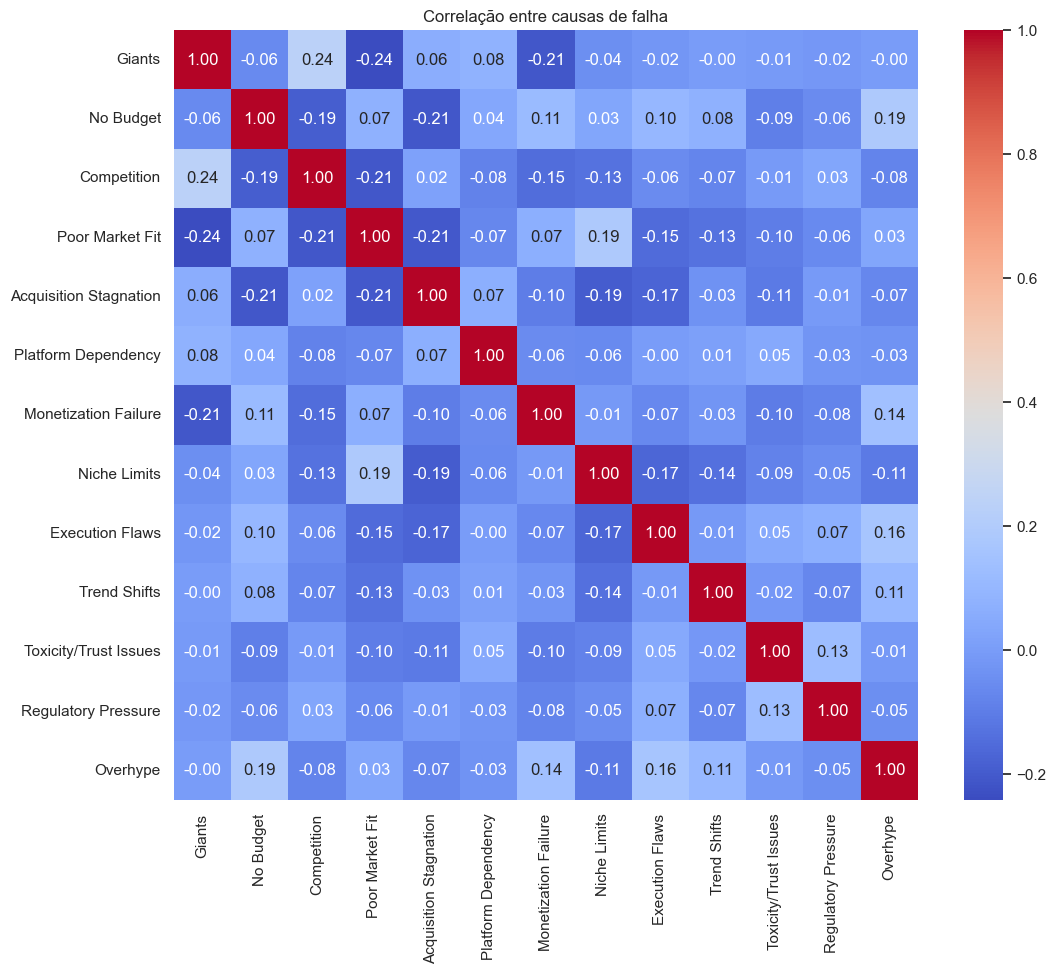

In [29]:
# Correlação entre causas de falha
corr_matrix = df[binary_cols].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre causas de falha")
plt.show()

In [39]:
df['Years_of_Operation_Num']  # coluna com anos de operação corrigida

47       3.0
48       7.0
49      10.0
50       6.0
51       5.0
        ... 
1159    15.0
1160     8.0
1161     9.0
1162     8.0
1163    12.0
Name: Years_of_Operation_Num, Length: 1087, dtype: float64

In [45]:
# Colunas binárias de causas de falha
binary_cols = ["Giants","No Budget","Competition","Poor Market Fit",
               "Acquisition Stagnation","Platform Dependency","Monetization Failure",
               "Niche Limits","Execution Flaws","Trend Shifts","Toxicity/Trust Issues",
               "Regulatory Pressure","Overhype"]

# Adiciona anos de operação
cols_for_corr = binary_cols + ['Years_of_Operation_Num']

In [41]:
corr_matrix = df[cols_for_corr].corr()

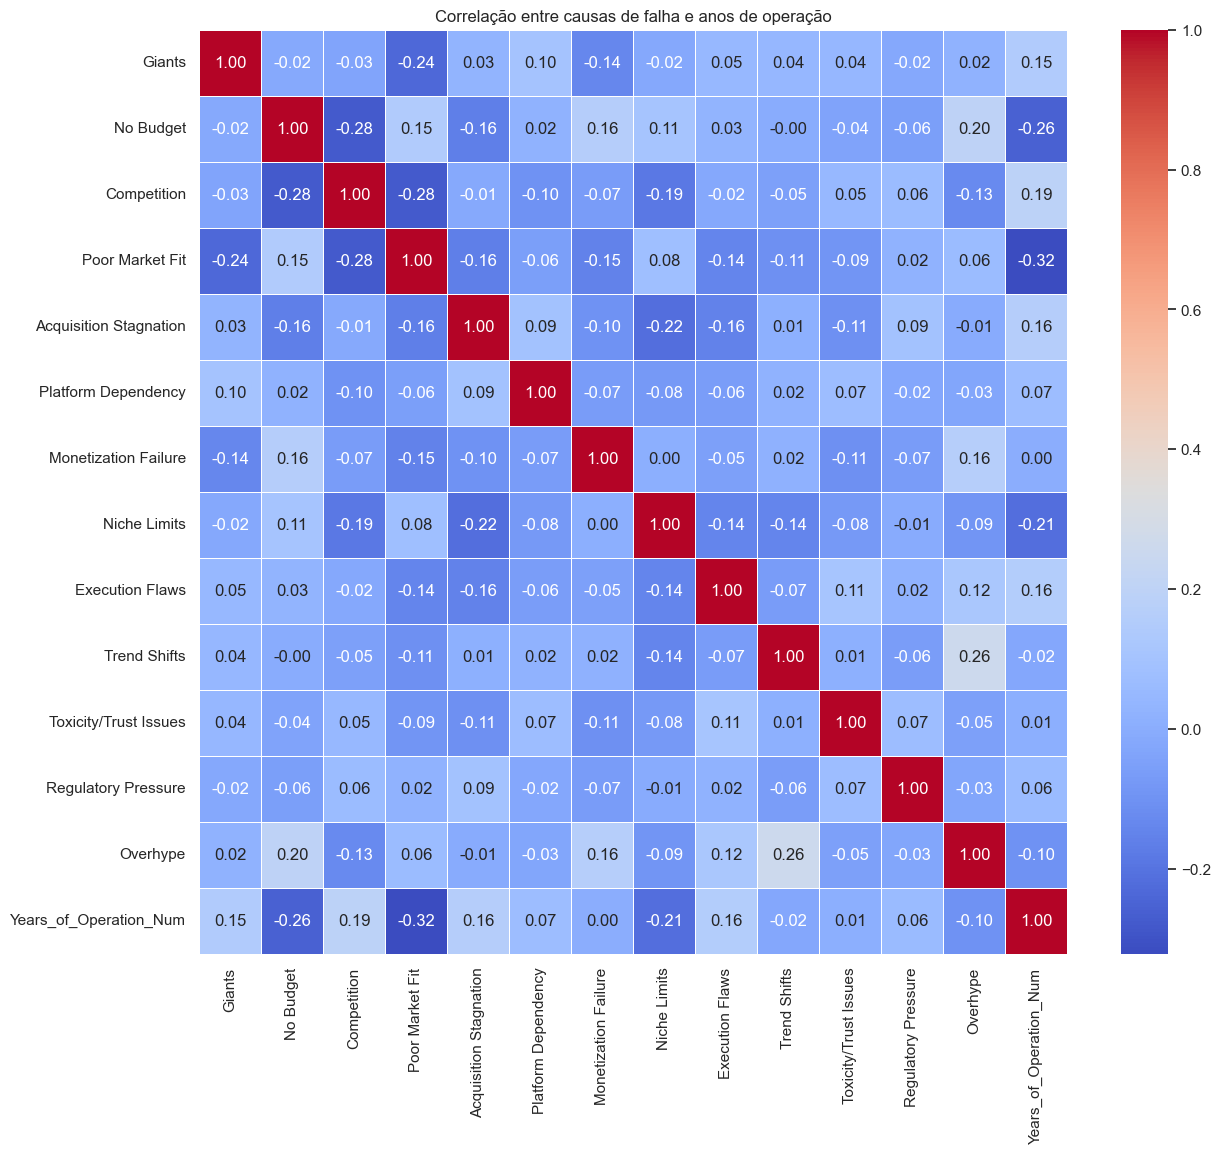

In [ ]:
plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix, annot="True", cmap="coolwarm", fmt=".2f", linewidthus=0.5)
plt.title("Correlação entre causas de falhas e anos de operação")
plt.show()

### Causas de falha que aparecem juntas

- **No Budget × Poor Market Fit**  
  Startups que não encontram product-market fit frequentemente **ficam sem dinheiro rapidamente**.  
  *Insight:* Validar demanda cedo ajuda a evitar falência por falta de capital.

- **Giants × Competition**  
  Startups que falham por gigantes muitas vezes também sofrem com concorrência direta.  
  *Insight:* Entrar em mercados dominados exige diferenciação clara.

- **Acquisition Stagnation × Giants**  
  Startups adquiridas ou afetadas por grandes players podem durar mais tempo, mesmo que não cresçam.  
  *Insight:* Ser adquirido pode prolongar a operação sem sucesso real.

- **Execution Flaws × Trend Shifts**  
  Falhas de execução se agravam quando tendências de mercado mudam rapidamente.  
  *Insight:* Boa gestão e adaptação são críticas em setores voláteis.

---

### Relação com duração da startup

- **No Budget** → correlação negativa forte  
  Startups sem capital duram menos.  

- **Poor Market Fit** → correlação negativa moderada  
  Produtos sem demanda também fecham rápido.

- **Giants** → correlação levemente positiva  
  Startups afetadas por gigantes podem durar mais tempo antes de serem superadas.

- **Acquisition Stagnation** → correlação positiva  
  Startups adquiridas podem continuar operando mesmo sem sucesso real.

- **Competition, Trend Shifts, Execution Flaws** → correlação próxima de 0 ou levemente negativa  
  Impacto na duração é variável.

---

### Principais insights estratégicos

1. **Capital e demanda são críticos**  
   Startups que falham por falta de dinheiro ou produto sem mercado duram muito menos.

2. **Ser adquirido ou competir com gigantes prolonga a operação**, mas não garante sucesso.

3. **Execução e tendências de mercado** são fatores de risco, mas impactam menos a duração que capital e demanda.

4. **Causas de falha combinadas**  
   - `No Budget + Poor Market Fit` e  
   - `Giants + Competition` são pares que merecem atenção especial em análises estratégicas.